# Sujet n°6 : Deepfake
*Sarfati Samuel, Dias Alexandre, Alvarez-Rodriguez Thomas , Moignet Gabriel*

In [2]:
#Librairies et bibliothèques nécessaires au fichier
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math as m
from scipy.stats import binom_test
from scipy.stats import norm
from scipy.stats import chi2_contingency

In [3]:
#Importation du fichier csv pour le lire.
df=pd.read_csv("pilot.csv",parse_dates=True)

## Visualisation et analyse exploratoire des données

### Le jeu de données

Voici un aperçu des premières lignes du jeu de données.

In [4]:
#Visualisation du jeu de données
df.head()

,guess,correct,seen,user_id,time_created
0,0,0,0,f1384754171255ab8e7ed81986701d7f,2020-04-30 20:35:25
1,0,1,1,f1384754171255ab8e7ed81986701d7f,2020-04-30 20:35:36
2,1,1,2,f1384754171255ab8e7ed81986701d7f,2020-04-30 20:35:46
3,1,0,3,f1384754171255ab8e7ed81986701d7f,2020-04-30 20:36:00
4,1,1,4,f1384754171255ab8e7ed81986701d7f,2020-04-30 20:36:17


In [5]:
print("Le jeu de données possède ",df.shape[0]," lignes pour ",df.shape[1]," colonnes de données.")


Le jeu de données possède  26820  lignes pour  5  colonnes de données.


Parmi ces 5 colonnes de données, chacune possède une information différente, telle que :

In [6]:
print("Les colonnes du jeu de données sont : ",df.columns)

Les colonnes du jeu de données sont :  Index(['guess', 'correct', 'seen', 'user_id', 'time_created'], dtype='object')



Et peuvent être décrites de la manière suivante :
*   guess : si la vidéo est identifiée comme "Deepfake" par le participant (0 non, 1 oui)
*   correct : si la vidéo est "Deepfake" (0 non, 1 oui)
*   seen : nombre d'essais réalisés par le participant sur différentes vidéos
*   user_id : identifiant unique par utilisateur
*   time_created : date et heure auxquels le test est présenté au participant.



Nous pouvons compter les relevés et candidats du jeu de données. 

In [7]:
print("Nombre de relevés : ",len(df["user_id"]))
print("Nombre de candidats uniques : ",len(df["user_id"].unique()))

Nombre de relevés :  26820
Nombre de candidats uniques :  5525


Comme nous allons le constater par la suite, le nombre de relevés n'est pas le même pour chaque candidat.

### Répartition du nombre de visionnages

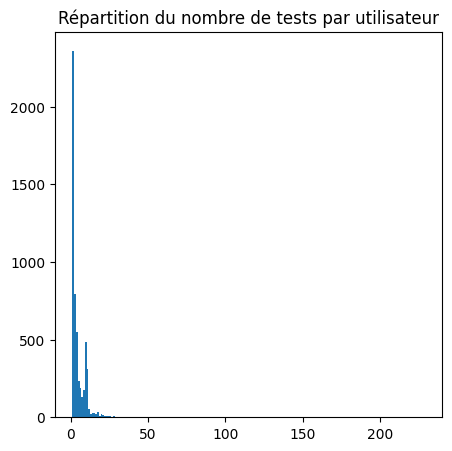

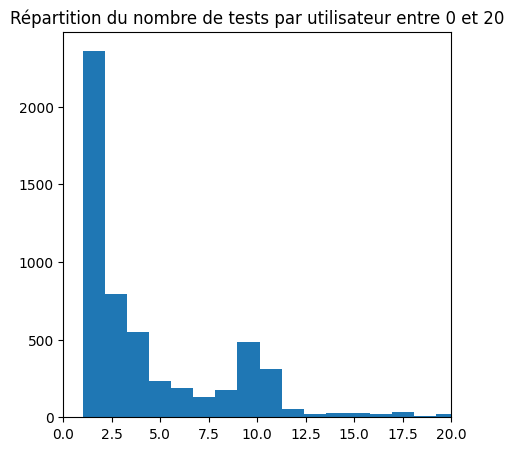

In [8]:
#Nombre de tests par utilisateur unique
nb_test_moy_par_user=df.value_counts("user_id")

#Histogramme du nombre de tests
plt.figure(figsize=(5,5))
plt.hist(nb_test_moy_par_user,bins=200)
plt.title("Répartition du nombre de tests par utilisateur")
plt.show()

#Histogramme du nombre de tests entre 0 et 20
plt.figure(figsize=(5,5))
plt.hist(nb_test_moy_par_user,bins=200)
plt.title("Répartition du nombre de tests par utilisateur entre 0 et 20")
plt.xlim([0,20])
plt.show()

On peut voir que la plupart des personnes n'ont fait qu'un unique test, et peu en ont fait 10. Il est apparent que les personnes ayant fait plus de 10 tests sont très minoritaires. Celles en ayant fait 1 ou 2 sont présentes en grande majorité.

L'échelle du premier histogramme étant automatiquement comprise entre 0 et environ 250 nuit à la lecture de l'ensemble, on va donc utiliser un diagramme en boîte pour avoir une meilleure visualisation des données et remarquer des "outliers". 

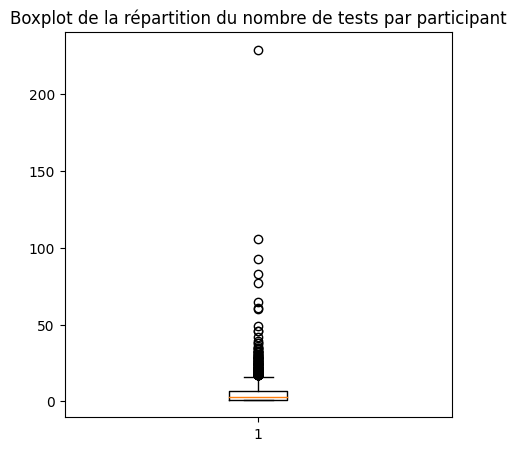

In [9]:
#Diagramme en boite du nombre de tests
plt.figure(figsize=(5,5))
plt.boxplot(nb_test_moy_par_user)
plt.title("Boxplot de la répartition du nombre de tests par participant")
plt.show()

Bien qu'imprécise, cette visualisation permet de voir qu'il y a quelques valeurs très élevées et qu'il y a des valeurs extrêmes qu'on ne voyait pas avant, ici il y en a une à plus de 200, qu'on ne voyait pas sur les histogrammes.
Il existerait donc un participant qui aurait fait plus de 250 tests.

### Proportion des bonnes identifications

Dans ce jeu de données, une interprétation importante à faire est l'identification correcte d'une vidéo, qu'elle soit "Deepfake" ou non.

In [10]:
print("Nombre de tests avec bonnes identifications : ",len(df[df["guess"]==df["correct"]]))
print("Nombre de tests avec mauvaises identifications : ",len(df[df["guess"]!=df["correct"]]))

Nombre de tests avec bonnes identifications :  13443
Nombre de tests avec mauvaises identifications :  13377


Sans tenir compte du participant, en prenant tous les tests faits, on peut constater qu'il y a presque autant de tests avec bonne identification qu'avec identificatione erronée. Il y a seulement 66 tests de différences, ce qui est très peu comparé aux plus de 26 000 tests faits.

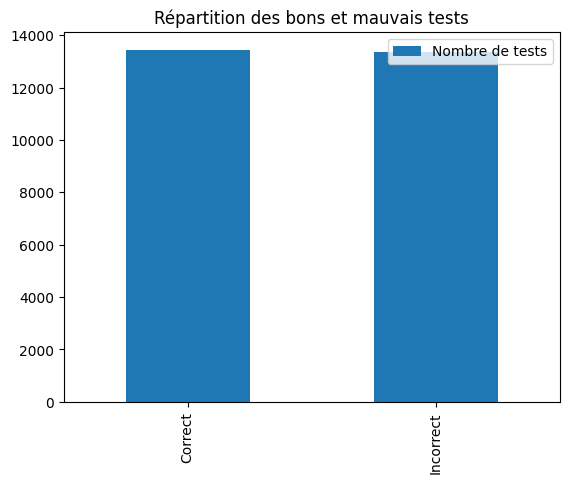

In [11]:
#Bar chart des bons et mauvais tests
da=df.copy()
da["correct_guess"]=df["guess"]==df["correct"]
da["correct_guess"].value_counts().plot(kind="bar")
plt.legend(["Nombre de tests"])
plt.xticks([0,1],["Correct","Incorrect"])
plt.title("Répartition des bons et mauvais tests")
plt.show()

L'histogramme montre qu'il n'y a qu'une différence minime entre les bonnes et mauvaises réponses. Afin d'avoir une vision plus détaillée de ces décisions, qu'elles soient correctes ou incorrectes, nous pouvons également visualiser les vrais positifs, vrais négatifs, faux positifs et faux négatifs. 

In [12]:
#Calcul des ces valeurs
vraispositifs=sum(df["guess"]*df["correct"])
vraisnegatifs=sum((1-df["guess"])*(1-df["correct"]))
fauxpositifs=sum(df["guess"]*(1-df["correct"]))
fauxnegatifs=sum((1-df["guess"])*df["correct"])

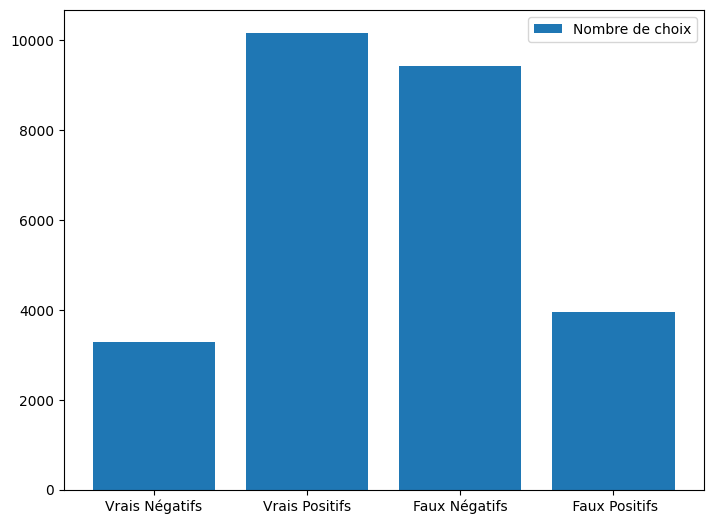

In [13]:
#Bar chart des ces variables
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
resultats = ['Vrais Négatifs', 'Vrais Positifs', 'Faux Négatifs', ' Faux Positifs']
valeurs = [vraisnegatifs,vraispositifs,fauxnegatifs,fauxpositifs]
ax.bar(resultats,valeurs)
plt.legend(["Nombre de choix"])
plt.show()

Grâce à cette visualisation, nous pouvons constater une nette majorité de "vrais positifs" (le sujet identifie correctement un deepfake) et de "faux négatifs" (le sujet affirme qu'il n'a pas affaire à un deepfake, alors que c'est le cas). 

Maintenant que l'on connaît la proportion de bonnes et mauvaises identifications, nous pouvons étudier l'influence de tests nombreux sur la capacité de discernement de l'utilisateur.

### Plus de 10 vs moins de 10 




Si dans les autres visualisations on ne tenait pas compte de l'utilisateur, on va maintenant essayer de voir l'influence que peut avoir cette donnée.

In [14]:
#Utilisateur ayant au moins 10 tests
user_10_seen=df.query("seen>=10")['user_id'].unique()
#Récupération des donées contenant ces utilisateurs
df_more_10=df[df["user_id"].isin(user_10_seen)]
#Tests avec bonne identification de ce sous-ensemble de données
bon=df_more_10[df_more_10["correct"]==df_more_10["guess"]]

print("Il y a ",len(user_10_seen)," utilisateur qui ont fait plus de 10 tests")
print("Les participants ayant visionné plus de 10 tests ont répondu juste : ",len(bon))
print("Pour :",len(df_more_10)," vidéos visionnées")
print("Soit un ratio de {:.2f}% d'identification correctes.".format(len(bon)/len(df_more_10)*100))

Il y a  609  utilisateur qui ont fait plus de 10 tests
Les participants ayant visionné plus de 10 tests ont répondu juste :  4824
Pour : 9552  vidéos visionnées
Soit un ratio de 50.50% d'identification correctes.


Grâce à ces relevés, on constate que les participants ayant fait plus de 10 tests sont effectivement minoritaires, ils ne sont que 609.

De plus, leur ratio de bonne identification semble être également proche de 50%, ce qui semble indiquer un effet nul du nombre de vidéos visionnées.

In [15]:
#Utilisateurs ayant moins de 10 tests
user_less_10_seen=df[~df["user_id"].isin(user_10_seen)]["user_id"].unique()
#Récupération des donées contenant ces utilisateurs
df_less_10=df[~df["user_id"].isin(user_10_seen)]
#Tests avec bonne identification de ce sous-ensemble de données
bon=df_less_10[df_less_10["correct"]==df_less_10["guess"]]

print("Il y a ",len(user_less_10_seen)," utilisateurs qui ont fait moins de 10 tests")
print("Les participants ayant visionné moins de 10 tests ont deviné : ",len(bon))
print("Pour :",len(df_less_10)," vidéos visionnées")
print("Soit un ratio de {:.2f}% de bonnes identifications".format(len(bon)/len(df_less_10)*100))

Il y a  4916  utilisateurs qui ont fait moins de 10 tests
Les participants ayant visionné moins de 10 tests ont deviné :  8619
Pour : 17268  vidéos visionnées
Soit un ratio de 49.91% de bonnes identifications


L'observation peut se faire sur le groupe inverse, et effectivement il y a 8 fois plus de personnes ayant fait moins de 10 tests. Au niveau de réussite des tests cela semble assez similaire à ceux ayant fait plus de 10 tests.

Il semblerait donc qu'il n'y ait pas de lien entre nombre de visionnages et réussite, de plus on pourrait tirer la conclusion que les participants ayant fait plus de 10 tests semblent être aussi précis que ceux en ayant fait moins.

Mais ne tirons pas de conclusions pour l'instant, nous essaierons de généraliser cette observation dans les tests d'hypothèses plus tard.

### Le temps de réflexion

Il peut aussi être utile de regarder le temps de réflexion par utilisateur, et de constater leur performance, tout en continuant la comparaison entre ceux ayant fait au moins 10 tests et ceux en ayant fait moins de 10.

Précision : Nous n'avons accès qu'à une entrée de donnée temporelle par test, et utiliserons l'intervalle entre 2 entrées d'un même utilisateur pour calculer son "temps de réflexion". Ceci étant dit, nous n'avons pas connaissance des conditions de l'étude, cette valeur peut donc correspondre au temps de réflexion tout comme elle peut représenter une pause après une vidéo, puis le visionnage de la suivante, puis le temps de réflexion.
Ne disposant toutefois que de ces entrées, nous considérerons donc l'intervalle entre deux tests comme temps de réflexion. 

In [16]:
#Pour calculer le temps de réflexion, on garde les utilisateurs ayant au moins fait 2 tests
list_user=df.groupby("user_id").filter(lambda x: len(x)>=2)
#Récupération de l'id de ces utilisateurs
list_user=list_user["user_id"].unique()

#Fonction calculant le temps de réflexion moyen pour un utilisateur (sur tous ses tests)
#En soustrayant un à un les temps de création des tests pour connaitre le temps de réflexion
def mean_reaction(da):
    t1=pd.to_datetime(da.iloc[1:]["time_created"]).reset_index(drop=True)
    t2=pd.to_datetime(da.iloc[0:-1]["time_created"]).reset_index(drop=True)
    return (t1-t2).dt.seconds.mean()

In [17]:
#Temps réflexion moyen général (pour les utilisateurs aavec au moins 2 tests)
temps_reflexion_moy=df[df["user_id"].isin(list_user)].groupby("user_id").apply(lambda x:mean_reaction(x)).mean()

print("Le temps de réflexion moyen par utilisateur est donc de : ",temps_reflexion_moy," secondes.")

Le temps de réflexion moyen par utilisateur est donc de :  220.54677784694297  secondes.


Le temps de réflexion moyen pour tous les utilisateurs semble être assez élevé.

In [18]:
#Calcul du temps de réflexion moyen pour les utilisateurs avec plus de 10 tests.
list_user=df.groupby("user_id").filter(lambda x: (len(x)>=2 and len(x)<10))
list_user=list_user["user_id"].unique()

temps_reflexion_moy_less_10=df[df["user_id"].isin(list_user)].groupby("user_id").apply(lambda x:mean_reaction(x)).mean()
print("Le temps de réflexion moyen par utilisateur ayant fait moins de 10 tests est donc de : ",temps_reflexion_moy_less_10," secondes.")

Le temps de réflexion moyen par utilisateur ayant fait moins de 10 tests est donc de :  234.05290845245878  secondes.


In [19]:
#Calcul du temps de réflexion moyen pour les utilisateurs au moins de 10 tests.
list_user=df.groupby("user_id").filter(lambda x: (len(x)>=10))
list_user=list_user["user_id"].unique()

temps_reflexion_moy_more_10=df[df["user_id"].isin(list_user)].groupby("user_id").apply(lambda x:mean_reaction(x)).mean()
print("Le temps de réflexion moyen par utilisateur ayant au moins 10 tests est donc de : ",temps_reflexion_moy_more_10," secondes.")

Le temps de réflexion moyen par utilisateur ayant au moins 10 tests est donc de :  180.0548686394259  secondes.


La conclusion que l'on peut tirer de ces résultats est que les utilisateurs ayant fait plus de 10 tests semblent avoir un meilleur temps de réflexion d'en moyenne 50 secondes, ce qui n'est pas négligeable.

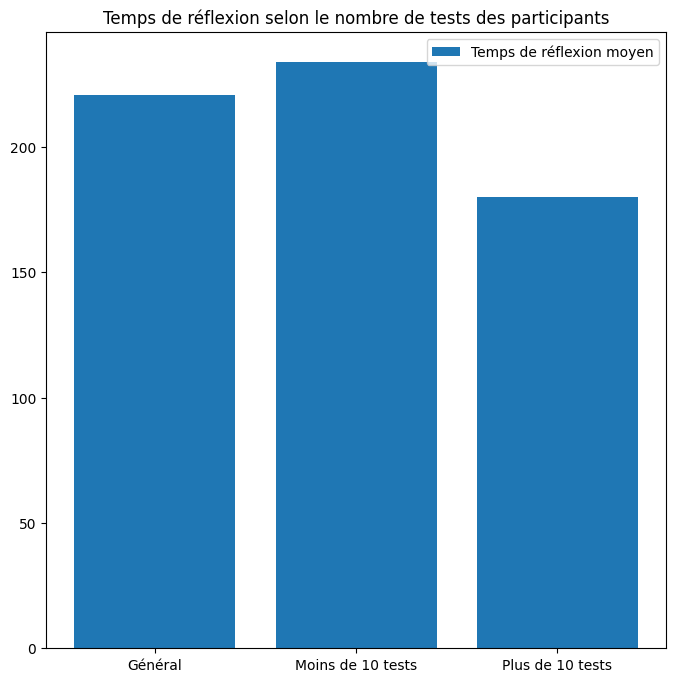

In [20]:
#Bar chart des temps de réflexion moyens
plt.figure(figsize=(8,8))
plt.bar(x=["Général","Moins de 10 tests","Plus de 10 tests"],height=[temps_reflexion_moy,temps_reflexion_moy_less_10,temps_reflexion_moy_more_10])
plt.legend(["Temps de réflexion moyen"])
plt.title("Temps de réflexion selon le nombre de tests des participants")
plt.show()

La tendance globale peut être ainsi visualisée.

## Tests d'hypothèses

### Les participants font-ils mieux que le hasard ?

Dans ce premier test d'hypothèses, nous souhaitons comparer la proportion de bonnes réponses à celle qui serait obtenue en décidant au hasard.
En partant du principe que les données respectent une loi de Bernoulli (de paramètre p=0,5), nous allons effectuer un test paramétrique, plus particulièrement un test de conformité sur des proportions.

On peut appliquer ce test car :
  - Chaque test est indépendant
  - Comme nous allons le voir, l'échantillon contient plus de 15 sujets avec et sans la caractéristique (identification correcte)
  - La population est au moins 10 fois plus grande (population mondiale).

In [21]:
nb_total_test=df.shape[0]
nb_test_reussi=df[df['guess']==df['correct']].shape[0]

print("Il y a eu : ",nb_total_test," tests effectués")
print("Il y a eu : ",nb_test_reussi," tests réussis")

Il y a eu :  26820  tests effectués
Il y a eu :  13443  tests réussis


A partir de ces chiffres, peut-on mettre en évidence que les participants font mieux que le hasard ?

Ici choisir au hasard reviendrait à avoir une probabilité de réussite pr=1/2 (identification correcte de la vidéo, deepfake ou pas). Si les participants font mieux que le hasard, nous obtiendrons pr>1/2.

#### Formalisation du problème
Nos hypothèses seront :
  - H0 : "Les participants ont une probabilité de réussite similaire à un choix au hasard", soit H0 : pr=1/2
  - H1 : "Les participants font mieux que le hasard", soit H1 : pr>1/2

La statistique de test sera :
Z = (pn-p0)/racine(po*(1-p0)/n) 
Avec po=1/2 et pn=13443/26820

Ensuite il faudra calculer la valeur-p telle que :
p=P(X>Z)=1-P(X<=Z)


In [22]:
#l'ensemble des participants font-ils mieux que le hasard ?
#le hasard fait 50% de bonnes réponses, on va donc calculer la p value correspondante par rapport à 0.5

Z = ((nb_test_reussi/nb_total_test) - 0.5 ) / m.sqrt(0.5 * (1 - 0.5) / nb_total_test)
print("La valeur de test est  : Z=",Z)

p_value = 1-norm.cdf(abs(Z))
print("La valeur-p est  : p=",p_value)

La valeur de test est  : Z= 0.40300881799602023
La valeur-p est  : p= 0.3434708687559418


Nous obtenons une valeur-p d'envrion 0.34, ce qui est bien supérieur à tout seuil raisonnable. L'hypothèse nulle ne peut donc pas être rejetée. Les données ne mettent pas en évidence que les participants font mieux que le hasard. 

### Les participants ayant au moins 10 tests ont-ils de meilleures performances que ceux en ayant fait moins ?

Dans ce test d'hypothèses nous souhaitons savoir si les participants ayant au moins 10 tests à leur actif ont de meilleurs performances que ceux en ayant fait moins. 
Il y avait plusieurs manières possibles de répondre à cette question, nous avons choisi de l'aborder sous l'angle de l'indépendance.

Nous allons voir si les caractères de "réussite" et du "nombre de tests" sont indépendants ou non. Nous procédons donc à un test d'indépendance.

On peut appliquer ce test car :
  - Chaque effectif contient des valeurs supérieures à 5 (voir en dessous).

In [23]:
user_more_10=df[df["seen"]>=10]["user_id"]
user_less_10=df[~df["user_id"].isin(df[df["seen"]>=10]["user_id"])]["user_id"]


df_more_10=df[df["user_id"].isin(user_more_10)]
df_less_10=df[df["user_id"].isin(user_less_10)]

print("Il y a : ",df_more_10.shape[0]," tests de personnes ayant fait au moins 10 tests")
print("Il y a : ",df_more_10[df_more_10['guess']==df_more_10['correct']].shape[0]," tests corrects parmi ceux-là")
print("Il y a : ",df_more_10[df_more_10['guess']==df_more_10['correct']].shape[0]/df_more_10.shape[0]*100 ,"% tests corrects parmi ceux-là")
print("Il y a : ",df_less_10.shape[0]," tests de personnes ayant fait moins de 10 tests")
print("Il y a : ",df_less_10[df_less_10['guess']==df_less_10['correct']].shape[0]," tests corrects parmi ceux-là")
print("Il y a : ",df_less_10[df_less_10['guess']==df_less_10['correct']].shape[0]/df_less_10.shape[0]*100 ,"% tests corrects parmi ceux-là")


Il y a :  9552  tests de personnes ayant fait au moins 10 tests
Il y a :  4824  tests corrects parmi ceux-là
Il y a :  50.502512562814076 % tests corrects parmi ceux-là
Il y a :  17268  tests de personnes ayant fait moins de 10 tests
Il y a :  8619  tests corrects parmi ceux-là
Il y a :  49.9131341209173 % tests corrects parmi ceux-là


A partir de ces chiffres, peut-on mettre en avant l'indépendance du nombre de tests et de la réussite ?

#### Formalisation du test
Nos hypothèses seront :
  - H0 : "Le nombre de tests et la réussite sont indépendants"
  - H1 : "Le nombre de tests et la réussite ne sont pas indépendants"

La statistique de test sera calculée avec une librairie python, après construction d'un tableau réunissant les données.
La valeur-p sera p=P(X>Z), elle aussi son calcul sera compris dans la librairie python.  

In [24]:
#Les participants ayant fait plus de 10 tests font-ils mieux que ceux ayant fait moins de 10 tests ?
#On va faire un test de chi2 pour voir si les deux distributions sont différentes

#On va faire un tableau de contingence
#on a 2 colonnes : 1 pour les bonnes réponses et 1 pour les mauvaises réponses
#on a 2 lignes : 1 pour les personnes ayant fait plus de 10 tests et 1 pour les personnes ayant fait moins de 10 tests

#on cree un tableau de contingence vide
tableau_contingence=np.zeros((2,2))

#on remplit le tableau de contingence

#on remplit la premiere ligne
tableau_contingence[0,0]=df_more_10[df_more_10['guess']==df_more_10['correct']].shape[0]
tableau_contingence[0,1]=df_more_10[df_more_10['guess']!=df_more_10['correct']].shape[0]
#on remplit la deuxieme ligne
tableau_contingence[1,0]=df_less_10[df_less_10['guess']==df_less_10['correct']].shape[0]
tableau_contingence[1,1]=df_less_10[df_less_10['guess']!=df_less_10['correct']].shape[0]

#on fait le test de chi2
chi2_contingency(tableau_contingence)

print("La valeur-p est de : ",chi2_contingency(tableau_contingence)[1])

La valeur-p est de :  0.36194885854285286


La valeur-p résultante du test étant de 0.36194885854285286, elle reste très au-dessus de tout seuil raisonnable. L'hypothèse nulle n'est donc pas rejetée : le nombre de tests et la réussite sont indépendants.
Comme le nombre de tests est indépendant de la réussite, on en conclut que les sujets ayant fait plus de 10 tests ne sont apparemment pas plus aptes que les autres à détecter les deepfakes. 

### Les participants ayant fait au moins 10 tests font-ils mieux que le meilleur algorithme ?

Dans ce test d'hypothèses, nous souhaitons comparer la proportion de bonnes réponses à celle qui serait obtenue par le meilleur des algorithmes existant à l'époque de la réalisation de l'étude.
En partant du principe que les données respectent une loi de Bernoulli, nous allons effectuer un test paramétrique; plus particulièrement un test de conformité sur des proportions.

On peut appliquer ce test car :
  - Chaque test est indépendant
  - Comme nous allons le voir, l'échantillon contient plus de 15 sujets avec et sans la caractéristique (identification correcte)
  - La population est au moins 10 fois plus grande (population mondiale).

In [25]:
user_more_10=df[df["seen"]>=10]["user_id"]

df_more_10=df[df["user_id"].isin(user_more_10)]

print("Il y a : ",df_more_10.shape[0]," tests de personnes ayant fait au moins 10 tests")
print("Il y a : ",df_more_10[df_more_10['guess']==df_more_10['correct']].shape[0]," tests corrects parmi ceux-là")


Il y a :  9552  tests de personnes ayant fait au moins 10 tests
Il y a :  4824  tests corrects parmi ceux-là


A partir de ces chiffres, peut-on mettre en évidence que les participants font mieux que le meilleur algorithme, ayant un taux de réussite de 65% ?

Pour les participants, faire  mieux que l'algorithme reviendrait à obtenir pr>65/100.

Avoir des résultats inférieurs ou égaux (ne pas faire mieux, donc) à ceux de l'algorithme impliquerait pr <=65/100.

#### Formalisation du problème
Nos hypothèses seront :
  - H0 : "Les participants ne font pas mieux que l'algorithme", soit H0 : pr<=65/100
  - H1 : "Les participants font mieux que l'algorithme", soit H1 : pr>65/100

La statistique de test sera :
Z = (pn-p0)/racine(po*(1-p0)/n) 
Avec po=65/100 et pn=4824/9552

Ensuite, il faudra calculer la valeur-p telle que :
p=P(X>Z)=1-P(X<=Z)


In [26]:
nb_test_reussi_above_10 = df_more_10[df_more_10['guess']==df_more_10['correct']].shape[0] 
nb_total_above_10 = df_more_10.shape[0]

Z = ((nb_test_reussi_above_10/nb_total_above_10) - 0.65 ) / m.sqrt(0.65 * (1 - 0.65) / nb_total_above_10)
print("La valeur de test est  : Z=",Z)

p_value = 1-norm.cdf((Z))
print("La valeur-p est  : p=",p_value)

La valeur de test est  : Z= -29.7063434251503
La valeur-p est  : p= 1.0


Nous obtenons une valeur-p extrêmement haute. Afin d'obtenir une confirmation de notre résultat, nous décidons d'utiliser une autre librairie python pour effectuer un autre test de conformité à une loi.
#### Vérification secondaire en passant par une Loi Bernouilli de paramètre 0.65
L'objectif de ce dernier test sera de comparer nos données à une loi de Bernoulli à un taux de 0.65.

In [27]:
p_val=binom_test(df_more_10[df_more_10['guess']==df_more_10['correct']].shape[0],df_more_10.shape[0],0.65)
print("La valeur-p est  : p=",p_val)

La valeur-p est  : p= 3.887207245928397e-185


Grâce à cette valeur-p quasi-nulle obtenue, nous voyons que les résultats des participants sont très loin de suivre une loi de Bernoulli de paramètre p=0,65.
De plus, avec le test d'homogénéité, dont la valeur p est supérieure à tout seuil possible, on ne peut rejeter l'hypothèse nulle. Les données mettent en évidence que les participants sont loin d'être plus performants que le meilleur des algorithmes.

#### Conclusion

Grâce aux différents tests menés, nous avons pu constater que, pour les participants de cette étude, la capacité à différencier entre les vidéos deepfake et les vidéos non modifiées semble être de l'ordre du hasard.
Nous avons par la suite montré que l'entraînement ne modifiait pas le pourcentage de bonnes réponses et que le pourcentage de réussite était indépendant du nombre de tests réalisés par une même personne.
Même les utilisateurs ayant fait au moins 10 tests semblent être moins efficaces que l'algorithme.

Comme les personnes ont un taux de réussite similaire à celui obtenu en décidant au hasard, que l'entraînement (plus de 10 tests) ne joue pas ou très peu sur les résultats et que l'algorithme est nettement au-dessus des 50% de réussite propres au hasard, il est évident que l'algorithme obtient de bien meilleurs résultats que les participants, entraînés ou non. 